# Session 5: Edge Detection and Contours

In [1]:
# import dependencies
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [2]:
image_path = os.path.join("..", "data", "img", "coins.png")

In [3]:
image = cv2.imread(image_path)

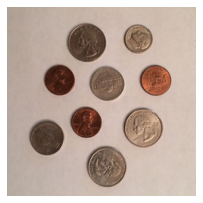

In [4]:
jimshow(image)

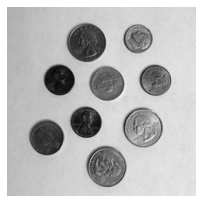

In [5]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
jimshow_channel(grey_image)

## Sobel Operators

In [6]:
#horizontal kernel
# signed so that we can go to black-white and white-black
sobelX = cv2.Sobel(grey_image, cv2.CV_64F, 1,0)
#vertical kernel
sobelY = cv2.Sobel(grey_image, cv2.CV_64F, 0,1)

In [7]:
# get absolute values
#when just running the sobel operation in makes dark-to-light edges one color, and light-to-dark edges another. When converting to absolute numbers, both colors represent edges
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelX))

In [8]:
sobel_edges = np.hstack([sobelX, sobelY])

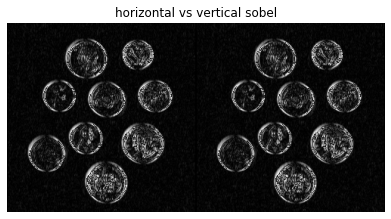

In [9]:
jimshow_channel(sobel_edges, "horizontal vs vertical sobel")

## Combined sobel

In [10]:
sobel_combined = cv2.bitwise_or(sobelX, sobelY)

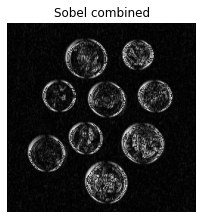

In [11]:
jimshow_channel(sobel_combined, "Sobel combined")

## Laplacian

In [12]:
laplace = cv2.Laplacian(grey_image, cv2.CV_64F)

In [13]:
laplace = np.uint8(np.absolute(laplace))

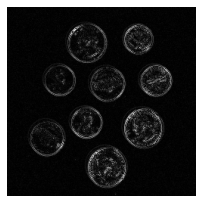

In [14]:
jimshow_channel(laplace, "Laplacian")

## Canny edge detection

In [16]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)

In [17]:
canny = cv2.Canny(blurred, 30, 150)

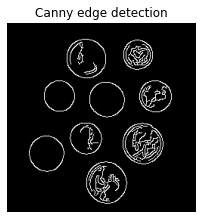

In [20]:
jimshow_channel(canny, "Canny edge detection")

## Find contours

In [27]:
(contours, _) = cv2.findContours(canny.copy(), 
                           cv2.RETR_EXTERNAL, 
                           cv2.CHAIN_APPROX_SIMPLE)

## Drawing contours

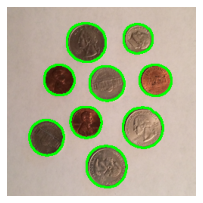

In [38]:
jimshow(cv2.drawContours(image.copy(),  # draw contours on original
                         contours,      # list of contours
                         -1,            # which contours
                         (0,255,0),     # contour color
                         2))            # controur piyel width

In [39]:
type(contours)

list

In [40]:
len(contours)

9

In [44]:
print(f"I can count {len(contours)} coins in the image!")

I can count 9 coins in the image!
